# Carga del archivo

In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constantes
DS_PATH = "analytics-disaster-project/data/eccc91e3-d623-4dc3-8413-1c6164424740_DisasterDeclarations.csv"

# Setea el maximo de filas a desplegar en 8
pd.options.display.max_rows = 11

# Lee el dataset
df = pd.read_csv(DS_PATH)
df.head()

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid
0,1,No,Yes,Yes,Yes,GA,1953-05-02T00:00:00,DR,Tornado,TORNADO,1953-05-02T00:00:00,1953-05-02T00:00:00,1954-06-01T00:00:00,NaN,1
1,2,No,Yes,Yes,Yes,TX,1953-05-15T00:00:00,DR,Tornado,TORNADO & HEAVY RAINFALL,1953-05-15T00:00:00,1953-05-15T00:00:00,1958-01-01T00:00:00,NaN,2
2,3,No,Yes,Yes,Yes,LA,1953-05-29T00:00:00,DR,Flood,FLOOD,1953-05-29T00:00:00,1953-05-29T00:00:00,1960-02-01T00:00:00,NaN,3
3,4,No,Yes,Yes,Yes,MI,1953-06-02T00:00:00,DR,Tornado,TORNADO,1953-06-02T00:00:00,1953-06-02T00:00:00,1956-02-01T00:00:00,NaN,4
4,5,No,Yes,Yes,Yes,MT,1953-06-06T00:00:00,DR,Flood,FLOODS,1953-06-06T00:00:00,1953-06-06T00:00:00,1955-12-01T00:00:00,NaN,5


# Exploración

Solo por probar hist() hice un histograma del número de desastre. Sin embargo el resultado no fue el esperado (distribución uniforme)...

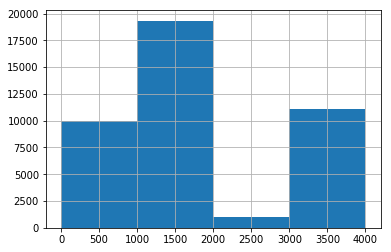

In [3]:
df['disaster_number'].hist(bins=[0,1000,2000,3000,4000])

Los números de desastre pueden estar repetidos; a primera vista lo que cambia entre el filas con el mismo número de desastre es el declared_county_area, pero hay que confirmarlo...

In [4]:
df[df['disaster_number'] == 263]

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid
22168,263,No,Yes,Yes,Yes,TN,1969-07-11T00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1969-07-11T00:00:00,1969-07-11T00:00:00,1972-06-22T00:00:00,Clay (County),1501
22169,263,No,Yes,Yes,Yes,TN,1969-07-11T00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1969-07-11T00:00:00,1969-07-11T00:00:00,1972-06-22T00:00:00,Cumberland (County),1502
22170,263,No,Yes,Yes,Yes,TN,1969-07-11T00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1969-07-11T00:00:00,1969-07-11T00:00:00,1972-06-22T00:00:00,Jackson (County),1503
22171,263,No,Yes,Yes,Yes,TN,1969-07-11T00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1969-07-11T00:00:00,1969-07-11T00:00:00,1972-06-22T00:00:00,Macon (County),1504
22172,263,No,Yes,Yes,Yes,TN,1969-07-11T00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1969-07-11T00:00:00,1969-07-11T00:00:00,1972-06-22T00:00:00,Overton (County),1505
22173,263,No,Yes,Yes,Yes,TN,1969-07-11T00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1969-07-11T00:00:00,1969-07-11T00:00:00,1972-06-22T00:00:00,Sumner (County),1506


Se hace una agregación para determinar por cada disaster_number si los valores en cada columna son el mismo...

In [66]:
def are_all_equal(series):
    if (pd.isna(series.values[0])): # == doesnt work as expected for NaN
        return all(pd.isna(val) for val in series.values)
    else:
        return all(val == series.values[0] for val in series.values)

dfAreSameByDisaster = df.groupby('disaster_number').aggregate(are_all_equal)
dfAreSameByDisaster

,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid
disaster_number,,,,,,,,,,,,,,
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,True,True,True,True,True,True,True,True,True,True,True,True,False,False
4154,True,True,True,True,True,True,True,True,True,True,True,True,False,False
4155,True,True,True,True,True,True,True,True,True,True,True,True,False,False


Y luego se hace otra agregación para verificar si para todos los disaster_number los valores en cada columna son el mismo. Al parecer las unicas columnas que cambian para un mismo disaster_number son state, declared_county_area y serialid.

In [67]:
def are_all_true(series):
    return all(val == True for val in series.values)

dsAreAlltrue = dfAreSameByDisaster.aggregate(are_all_true).to_frame().T
dsAreAlltrue

,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid
0,True,True,True,True,False,True,True,True,True,True,True,True,False,False


In [70]:
df.describe(include='all')

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid
count,43367.000000,43367,43367,43367,43367,43367,43367,43367,43367,43367,43367,43012,29891,43170,43367.000000
unique,NaN,2,2,2,2,59,2366,4,21,1456,2202,2246,1199,2123,NaN
top,NaN,No,No,Yes,Yes,TX,2005-09-10T00:00:00,DR,Severe Storm(s),SEVERE STORMS & FLOODING,2005-08-29T00:00:00,2005-10-01T00:00:00,1994-06-30T00:00:00,Washington (County),NaN
freq,NaN,35896,23243,41972,32337,3558,777,31287,14544,3387,2764,2926,408,384,NaN
mean,1862.533217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21684.000000
std,1092.560275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12519.118899
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,1046.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10842.500000
50%,1593.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21684.000000
75%,3107.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32525.500000
